LSTM-CNN

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Cross-Validated RMSE: 5.96 ± 5.96
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1953/1953 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - loss: 0.0042
Epoch 2/10
1953/1953 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - loss: 0.0019
Epoch 3/10
1953/1953 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - loss: 0.0015
Epoch 4/10
1953/1953 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - loss: 0.0013
Epoch 5/10
1953/1953 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - loss: 0.0013
Epoch 6/10
1953/1953 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - loss: 0.0012
Epoch 7/10
1953/1953 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 0.0013
Epoch 8/10
1953/1953 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - loss: 0.0012
Epoch 9/10
1953/1953 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - loss: 0.0012
Epoch 10/10
1953/1953 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 0.0012
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Test RMSE: 20.88


<ipython-input-1-7c54b3315cff>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


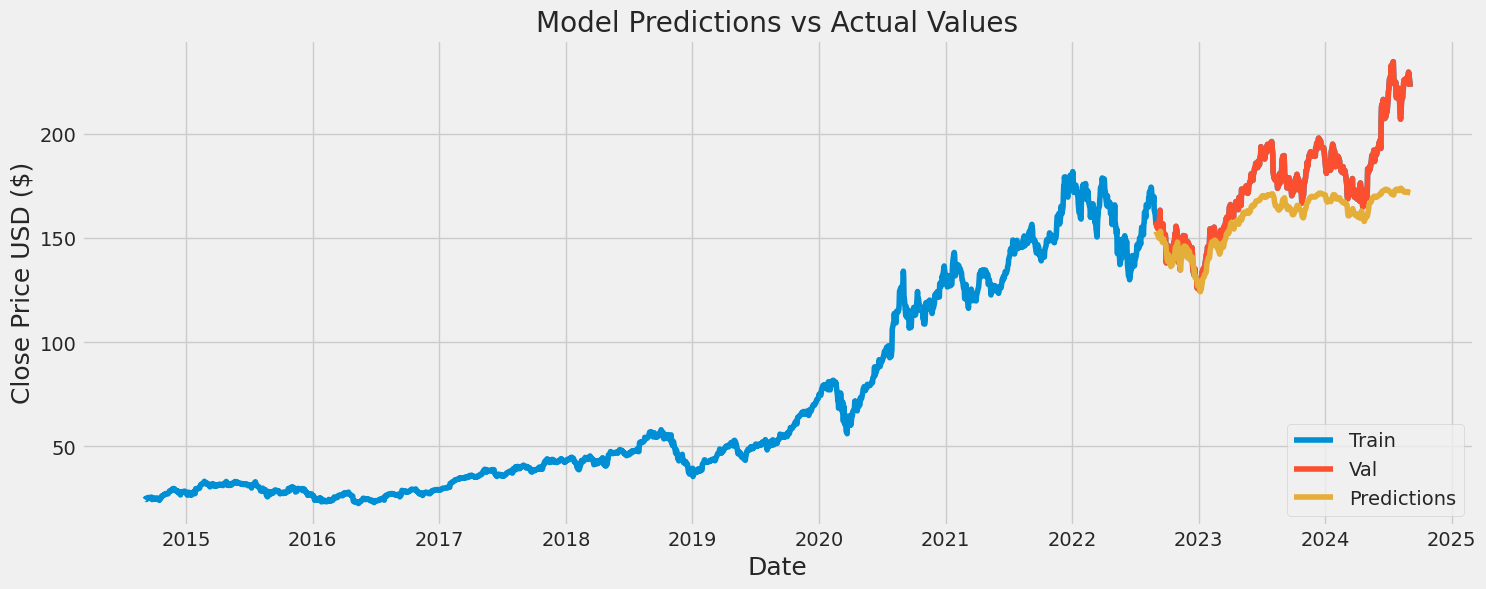

Total Returns: 1685.0599365234375
Final Balance: 11685.059936523438


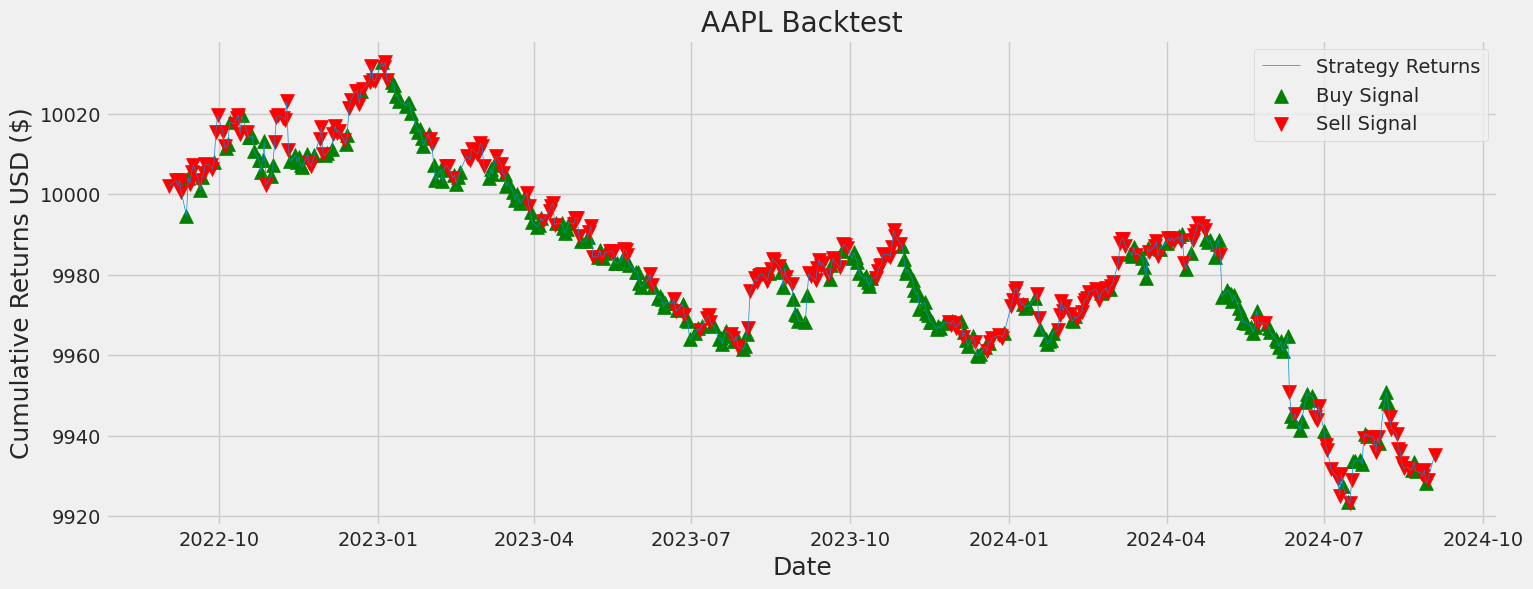

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score  # Import r2_score

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")


# The tech stock we'll use for this analysis
stock = 'AAPL'

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

# Download stock data
data = yf.download(stock, start=start, end=end)

def prepare_data(stock_df, feature_col='Close', test_size=0.2):
    data = stock_df.filter([feature_col])
    dataset = data.values
    training_data_len = int(np.ceil(len(dataset) * 0.8))

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    train_data = scaled_data[0:int(training_data_len), :]
    test_data = scaled_data[training_data_len - 60:, :]

    x_train = []
    y_train = []
    x_test = []
    y_test = dataset[training_data_len:, :]

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_test = np.array(x_test)

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    return x_train, y_train, x_test, y_test, scaler, dataset, training_data_len

def build_model(optimizer='adam', lstm_units=50, dropout_rate=0.2):
    # Build the hybrid CNN-LSTM model
    model = Sequential()
    # Add a Conv1D layer
    model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(60, 1)))
    model.add(MaxPooling1D(pool_size=2))
    # Add the LSTM layers
    model.add(LSTM(lstm_units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(lstm_units // 2, return_sequences=False))
    model.add(Dropout(dropout_rate))
    # Add the Dense layers
    model.add(Dense(25))
    model.add(Dense(1))
    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

def backtest_model(stock_df, model_func, start_balance=10000, epochs=10, batch_size=1, patience=3, plot_signals=False):
    x_train, y_train, x_test, y_test, scaler, dataset, training_data_len = prepare_data(stock_df)

    model = model_func()
    early_stopping = EarlyStopping(monitor='loss', patience=patience, restore_best_weights=True)
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[early_stopping])

    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Calculate and visualize RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"Test RMSE: {rmse:.2f}")

    # Calculate R-squared
    r2 = r2_score(y_test, predictions)
    print(f"R-squared: {r2:.2f}")

    # Plot the predictions vs actual values
    valid = stock_df[training_data_len:]
    valid['Predictions'] = predictions

    plt.figure(figsize=(16, 6))
    plt.title('Model Predictions vs Actual Values')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(stock_df['Close'], label='Historical Prices')
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

    signals = np.where(predictions[:-1] < predictions[1:], 1, -1)
    returns = np.diff(stock_df['Close'].values[training_data_len:])
    strategy_returns = signals * returns

    cumulative_returns = np.cumsum(strategy_returns)
    total_returns = start_balance + cumulative_returns

    print(f"Total Returns: {total_returns[-1] - start_balance}")
    print(f"Final Balance: {total_returns[-1]}")

    plot_dates = stock_df.index[training_data_len + 1: training_data_len + 1 + len(total_returns)]

    if len(plot_dates) > len(total_returns):
        plot_dates = plot_dates[:len(total_returns)]
    elif len(total_returns) > len(plot_dates):
        total_returns = total_returns[:len(plot_dates)]

    plt.figure(figsize=(16, 6))
    plt.title(f'{stock} Backtest')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Cumulative Returns USD ($)', fontsize=18)
    plt.plot(plot_dates, total_returns, linewidth=0.5, label='Strategy Returns')

    if plot_signals:
        buy_signals = np.where(signals == 1)[0]
        sell_signals = np.where(signals == -1)[0]
        plt.scatter(plot_dates[buy_signals], total_returns[buy_signals], label='Buy Signal', marker='^', color='g', s=100)
        plt.scatter(plot_dates[sell_signals], total_returns[sell_signals], label='Sell Signal', marker='v', color='r', s=100)

    plt.legend()
    plt.show()

def cross_validate_model(data_values, model_func, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    rmses = []

    for train_index, test_index in tscv.split(data_values):
        train, test = data_values[train_index], data_values[test_index]
        stock_df = pd.DataFrame(data=train, columns=['Close'])
        x_train, y_train, x_test, y_test, scaler, _, _ = prepare_data(stock_df)

        model = model_func()
        model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=0)

        predictions = model.predict(x_test)
        predictions = scaler.inverse_transform(predictions)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        rmses.append(rmse)

    mean_rmse = np.mean(rmses)
    return mean_rmse, np.std(rmses)

# Cross-validate the model
data_values = data.filter(['Close']).values
mean_rmse, std_rmse = cross_validate_model(data_values, lambda: build_model(optimizer='adam', lstm_units=50, dropout_rate=0.2), n_splits=5)
print(f"Cross-Validated RMSE: {mean_rmse:.2f} ± {std_rmse:.2f}")

# Backtest the model and include R-squared score
backtest_model(data, lambda: build_model(optimizer='adam', lstm_units=50, dropout_rate=0.2), epochs=10, batch_size=1, patience=3, plot_signals=True)


Improved LSTM

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
MAE: 0.6171676100971543, MSE: 0.6088684031714773, RMSE: 0.780300200673739, R2: 0.9139613583496125


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step
MAE: 0.7623213901698033, MSE: 0.9469608952348906, RMSE: 0.9731191577781678, R2: 0.887373739711173


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step
MAE: 0.9696273375894422, MSE: 1.7199325539082888, RMSE: 1.3114619910269183, R2: 0.9704933083909972


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
MAE: 2.212740860698379, MSE: 10.975898047146782, RMSE: 3.312989291734397, R2: 0.9814081798640981


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step
MAE: 3.8901320127683263, MSE: 24.486804182703438, RMSE: 4.948414309928327, R2: 0.9055676770696699
Mean MAE: 1.690397842264621, Std MAE: 1.236473356152001
Mean MSE: 7.747692816432975, Std MSE: 9.210492069307326
Mean RMSE: 2.26525699022831, Std RMSE: 1.6174991760909045
Mean R2: 0.9317608526771102, Std R2: 0.03725098781672173


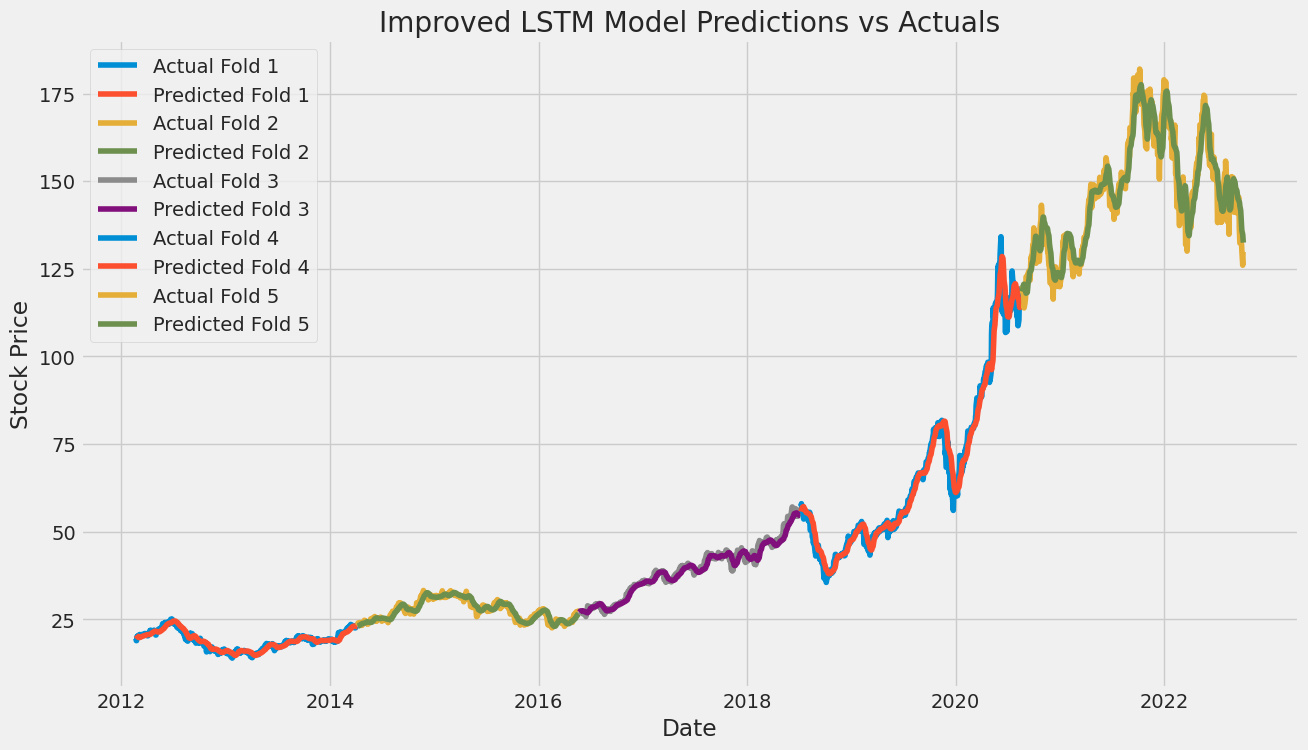

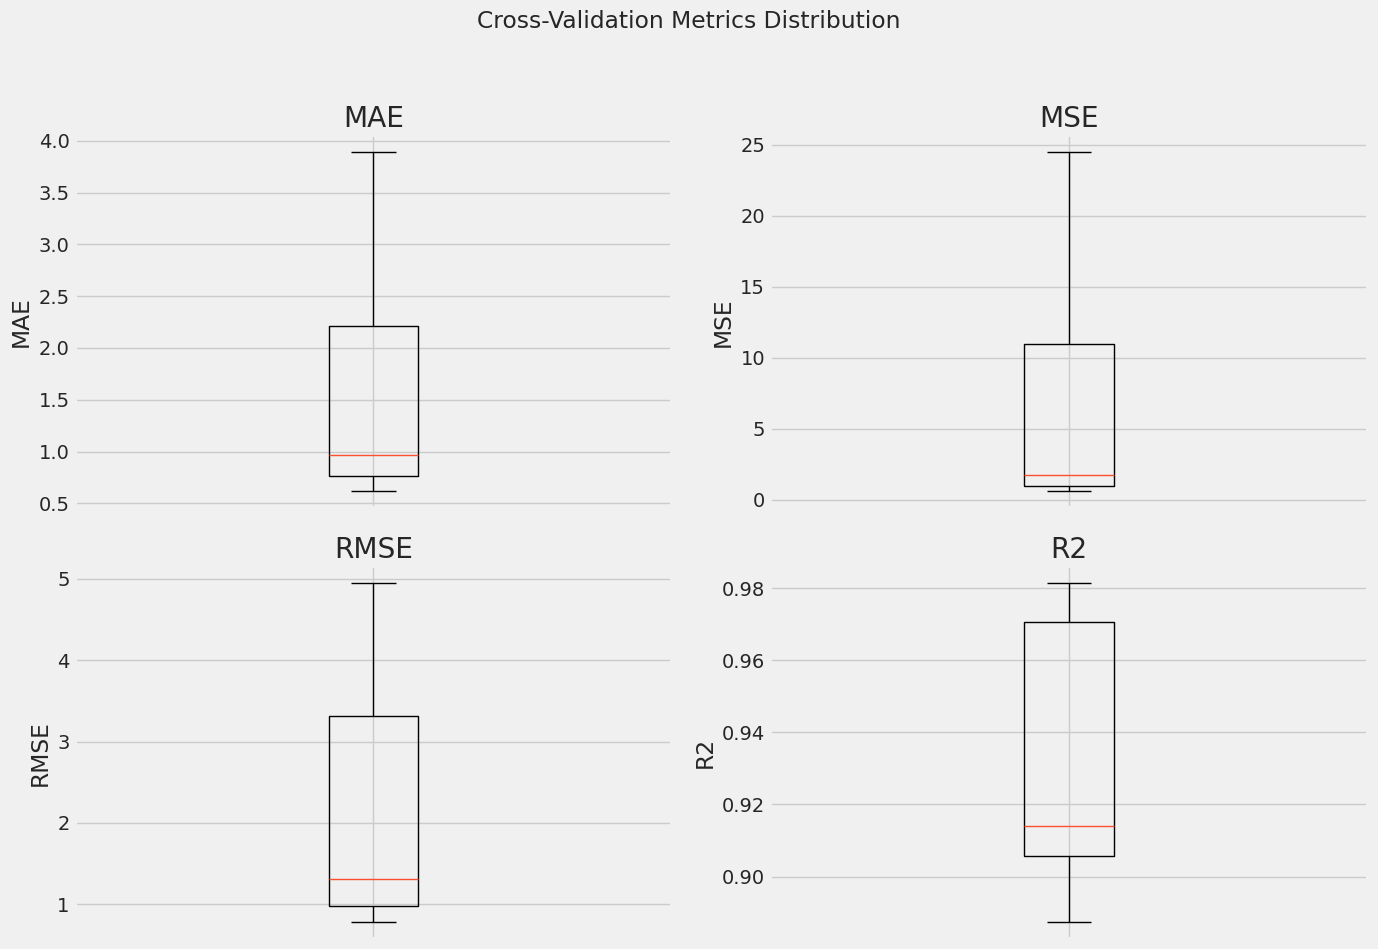

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.dates as mdates

# Step 1: Download historical stock data
stock_data = yf.download('AAPL', start='2010-01-01', end='2023-01-01')

# Step 2: Prepare data
data = stock_data[['Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 3: Create dataset
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60
X, y = create_dataset(scaled_data, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Step 4: Cross-validation setup
tscv = TimeSeriesSplit(n_splits=5)
mae_scores, mse_scores, rmse_scores, r2_scores = [], [], [], []
predictions_all, y_test_all, test_indices_all = [], [], []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Step 5: Build and train LSTM model with improvements
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(look_back, 1)))
    model.add(Dropout(0.3))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(units=1))

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Adding callbacks: EarlyStopping and ReduceLROnPlateau
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),
              callbacks=[early_stopping, reduce_lr], verbose=0)

    # Step 6: Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    predictions_all.append(predictions)
    y_test_all.append(y_test_scaled)
    test_indices_all.append(test_index)

    # Step 7: Evaluate the model
    mae = mean_absolute_error(y_test_scaled, predictions)
    mse = mean_squared_error(y_test_scaled, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_scaled, predictions)

    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}')

# Step 8: Print cross-validation results
print(f'Mean MAE: {np.mean(mae_scores)}, Std MAE: {np.std(mae_scores)}')
print(f'Mean MSE: {np.mean(mse_scores)}, Std MSE: {np.std(mse_scores)}')
print(f'Mean RMSE: {np.mean(rmse_scores)}, Std RMSE: {np.std(rmse_scores)}')
print(f'Mean R2: {np.mean(r2_scores)}, Std R2: {np.std(r2_scores)}')

# Plot results for each fold
plt.figure(figsize=(14, 8))
for i, (pred, true, test_indices) in enumerate(zip(predictions_all, y_test_all, test_indices_all)):
    plt.plot(stock_data.index[test_indices], true, label=f'Actual Fold {i+1}')
    plt.plot(stock_data.index[test_indices], pred, label=f'Predicted Fold {i+1}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Improved LSTM Model Predictions vs Actuals')
plt.legend()
plt.show()

# Plot distribution of evaluation metrics
metrics = {'MAE': mae_scores, 'MSE': mse_scores, 'RMSE': rmse_scores, 'R2': r2_scores}
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Cross-Validation Metrics Distribution')

for ax, (metric, scores) in zip(axs.flatten(), metrics.items()):
    ax.boxplot(scores)
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xticklabels([''])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


CNN-GRU

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0163 - val_loss: 0.0039
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0011 - val_loss: 6.8379e-04
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 9.7562e-04 - val_loss: 0.0027
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 9.2565e-04 - val_loss: 0.0042
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 8.8048e-04 - val_loss: 6.0070e-04
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 7.8225e-04 - val_loss: 0.0028
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 8.0963e-04 - val_loss: 0.0019
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 9.1922e-04 - val_loss: 0.0044
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 7.0064e-04 - val_loss: 7.1219e-04
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 7.3943e-04 - val_loss: 0.0037
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 7.2969e-04 - val_loss: 6.1622e-04
Epoch 12/50
44/44 ━━━━

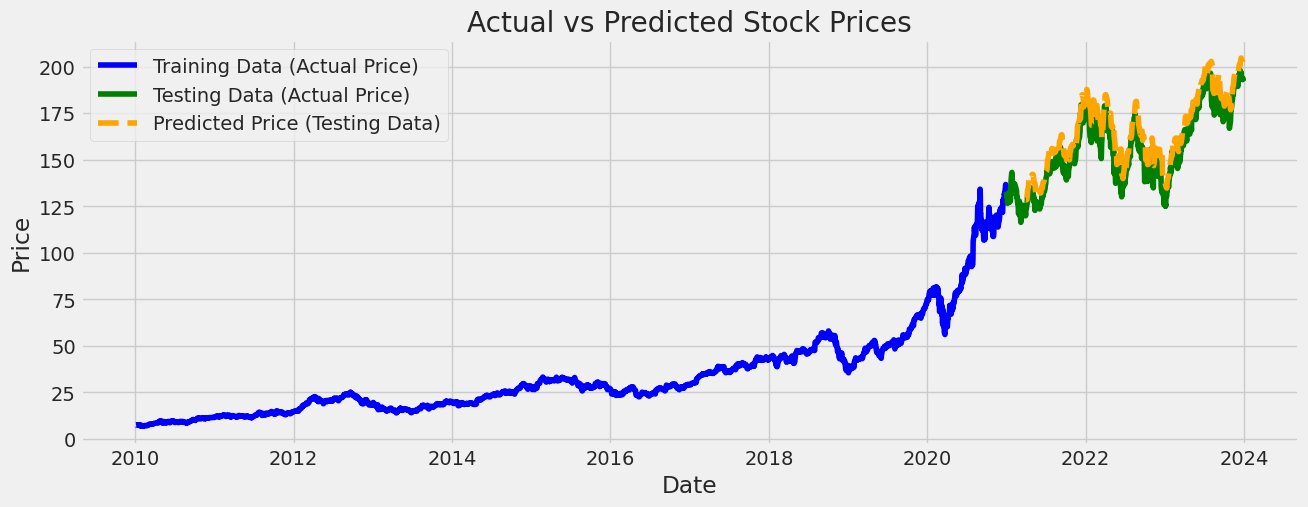

In [ ]:
import yfinance as yf
import pandas as pd

# Download Apple stock data
data = yf.download('AAPL', start='2010-01-01', end='2024-01-01')
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, 3])  # Using the 'Close' price as the label
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(scaled_data, time_step)

# Split into training and testing sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, Conv1D, MaxPooling1D, Flatten

# Build the model
model = Sequential()

# Add CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))


# Add GRU layer
model.add(GRU(units=100, return_sequences=False))

# Add Dense layers
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss}, Test Loss: {test_loss}')

# Make predictions
predictions = model.predict(X_test)

# Ensure predictions are 2D (necessary for inverse_transform)
predictions = predictions.reshape(-1, 1)

# Create an array matching the original data structure for inverse transformation
predictions_extended = np.zeros((len(predictions), scaled_data.shape[1]))
predictions_extended[:, 3] = predictions[:, 0]  # Place predictions in the 'Close' column (index 3)

# Inverse transform to get the original scale
predictions_inverse = scaler.inverse_transform(predictions_extended)[:, 3]  # Extract the 'Close' price

# Extract the actual 'Close' prices for the testing dataset
actual_prices_test = data['Close'].values[-len(predictions_inverse):]

# Calculate evaluation metrics
mse = mean_squared_error(actual_prices_test, predictions_inverse)
mae = mean_absolute_error(actual_prices_test, predictions_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(actual_prices_test, predictions_inverse)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

# Create an array to hold all predicted prices, initialized with NaNs
full_predictions = np.full((len(data),), np.nan)

# Place the inverse-transformed predictions in the correct position in the full_predictions array
full_predictions[-len(predictions_inverse):] = predictions_inverse

# Extract the actual 'Close' prices for the entire dataset
actual_prices = data['Close'].values  # No need to slice, use full data

# Split actual prices into training and testing parts
train_size = len(X_train)
train_actual_prices = actual_prices[:train_size]
test_actual_prices = actual_prices[train_size:]

# Plotting
plt.figure(figsize=(14, 5))

# Plot training data
plt.plot(data.index[:train_size], train_actual_prices, label='Training Data (Actual Price)', color='blue')

# Plot testing data
plt.plot(data.index[train_size:], test_actual_prices, label='Testing Data (Actual Price)', color='green')

# Plot predictions on testing data
plt.plot(data.index[-len(predictions_inverse):], predictions_inverse, label='Predicted Price (Testing Data)', linestyle='--', color='orange')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()


LSTM-GRU

[*********************100%***********************]  1 of 1 completed

Epoch 1/100



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 296ms/step - loss: 0.0187 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 27s 475ms/step - loss: 9.9204e-04 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 384ms/step - loss: 7.1243e-04 - val_loss: 0.0030 - learning_rate: 0.0010
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 391ms/step - loss: 5.8203e-04 - val_loss: 0.0037 - learning_rate: 0.0010
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 335ms/step - loss: 5.2870e-04 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 316ms/step - loss: 5.8244e-04 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 364ms/step - loss: 4.2236e-04 - val_loss: 0.0038 - learning_rate: 2.0000e-04
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 294ms/step - loss: 3.4404e-04 - val_loss: 0.0045 - learning_rate: 2.0000e-04
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 250ms/step - loss: 3.5558e-04 - val_l

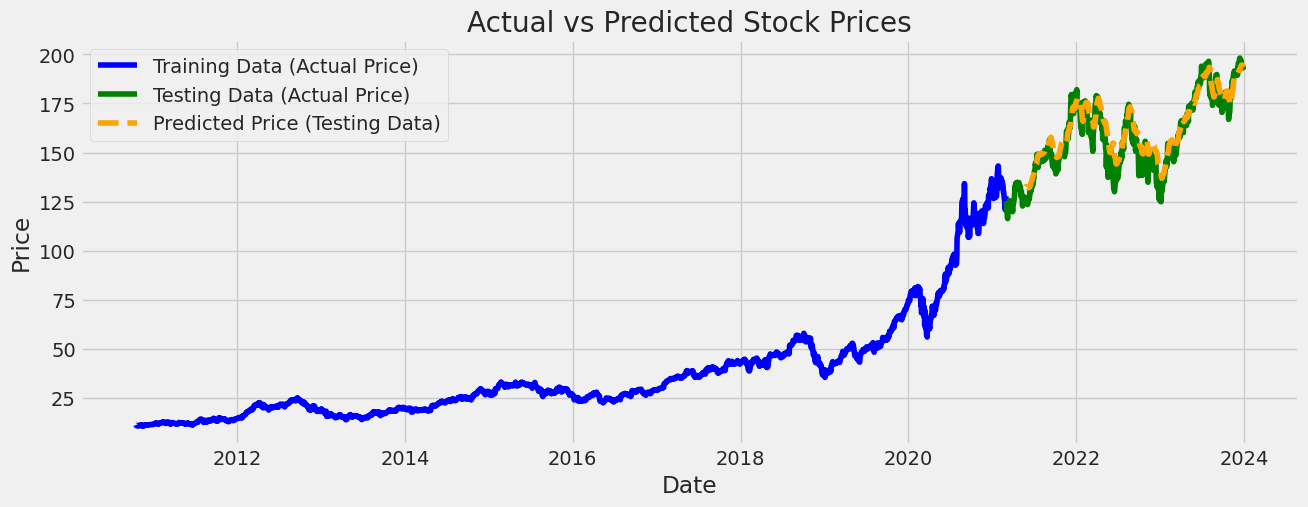

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, LSTM, Bidirectional, Attention
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Download Apple stock data
data = yf.download('AAPL', start='2010-01-01', end='2024-01-01')
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Feature Engineering: Adding technical indicators (optional)
def add_technical_indicators(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    df.dropna(inplace=True)  # Drop rows with NaN values from indicators
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

data = add_technical_indicators(data)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, 3])  # Using the 'Close' price as the label
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(scaled_data, time_step)

# Split into training and testing sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the model
model = Sequential()

# Add Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(Dropout(0.3))

# Add GRU layer
model.add(GRU(units=100, return_sequences=False))
model.add(Dropout(0.3))

# Add Dense layers
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Implement early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping, reduce_lr])

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss}, Test Loss: {test_loss}')

# Make predictions
predictions = model.predict(X_test)

# Ensure predictions are 2D (necessary for inverse_transform)
predictions = predictions.reshape(-1, 1)

# Create an array matching the original data structure for inverse transformation
predictions_extended = np.zeros((len(predictions), scaled_data.shape[1]))
predictions_extended[:, 3] = predictions[:, 0]  # Place predictions in the 'Close' column (index 3)

# Inverse transform to get the original scale
predictions_inverse = scaler.inverse_transform(predictions_extended)[:, 3]  # Extract the 'Close' price

# Extract the actual 'Close' prices for the testing dataset
actual_prices_test = data['Close'].values[-len(predictions_inverse):]

# Calculate evaluation metrics
mse = mean_squared_error(actual_prices_test, predictions_inverse)
mae = mean_absolute_error(actual_prices_test, predictions_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(actual_prices_test, predictions_inverse)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

# Create an array to hold all predicted prices, initialized with NaNs
full_predictions = np.full((len(data),), np.nan)

# Place the inverse-transformed predictions in the correct position in the full_predictions array
full_predictions[-len(predictions_inverse):] = predictions_inverse

# Extract the actual 'Close' prices for the entire dataset
actual_prices = data['Close'].values

# Split actual prices into training and testing parts
train_size = len(X_train)
train_actual_prices = actual_prices[:train_size]
test_actual_prices = actual_prices[train_size:]

# Plotting
plt.figure(figsize=(14, 5))

# Plot training data
plt.plot(data.index[:train_size], train_actual_prices, label='Training Data (Actual Price)', color='blue')

# Plot testing data
plt.plot(data.index[train_size:], test_actual_prices, label='Testing Data (Actual Price)', color='green')

# Plot predictions on testing data
plt.plot(data.index[-len(predictions_inverse):], predictions_inverse, label='Predicted Price (Testing Data)', linestyle='--', color='orange')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()


ARIMA

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.5 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-18382.753, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18380.253, Time=0.40 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-18384.748, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-18384.748, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-18372.915, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-18382.748, Time=1.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-18380.747, Time=1.60 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-18376.599, Time=0.18 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 5.374 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3522
Model:               SARIMAX(1, 1, 0)   Log Likelihood                9195.374
Date:                Wed, 28 Aug 2024   AIC                         -18384.748
Time:               

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

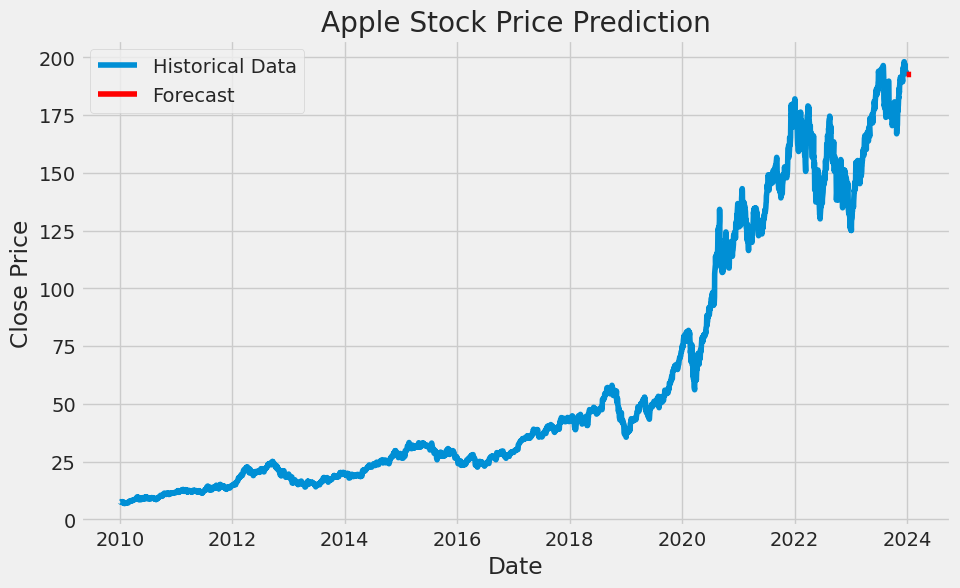

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Cross-Validation RMSE: 18.82442276711244


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
!pip install pmdarima
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy.stats import boxcox

# Step 1: Download Apple stock data
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2024-01-01'

data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Preprocess the data
# Use the 'Close' column for ARIMA modeling
data = data[['Close']]
data = data.dropna()

# Step 3: Log transform the data to stabilize variance
data['Close_log'] = np.log(data['Close'])

# Step 4: Use auto_arima to find the best order (p, d, q) with boxcox transformation
stepwise_model = auto_arima(data['Close_log'], start_p=1, start_q=1,
                            max_p=5, max_q=5, m=1,
                            start_P=0, seasonal=False,
                            d=None, D=0, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True,
                            max_order=10, boxcox=True)

print(stepwise_model.summary())

# Step 5: Fit the ARIMA model using the log-transformed data
model = ARIMA(data['Close_log'], order=stepwise_model.order)
model_fit = model.fit()

# Step 6: Make predictions
forecast_steps = 30  # Predict the next 30 days
forecast_log = model_fit.forecast(steps=forecast_steps)
forecast = np.exp(forecast_log)  # Invert the log transformation

forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Step 7: Visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Historical Data')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Step 8: Cross-validation (Improved Evaluation)
def cross_validation(data, stepwise_model, k=5):
    fold_size = len(data) // k
    errors = []

    for i in range(k):
        train = data[:i * fold_size + fold_size]
        test = data[i * fold_size + fold_size:(i + 1) * fold_size + fold_size]

        model = ARIMA(train, order=stepwise_model.order)
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test))
        predictions = np.exp(predictions)  # Invert log transformation

        rmse = np.sqrt(mean_squared_error(np.exp(test), predictions))
        errors.append(rmse)

    return np.mean(errors)

cv_rmse = cross_validation(data['Close_log'], stepwise_model, k=5)
print(f'Cross-Validation RMSE: {cv_rmse}')


ARIMA+GARCH


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 30.3 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=19.16 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-15915.980, Time=0.92 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-16866.184, Time=2.63 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=20.35 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-15918.867, Time=0.51 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-17278.185, Time=4.79 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=30.34 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=27.67 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-17276.420, Time=2.54 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-17276.296, Time=9.21 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-17275.828, Time=9.10 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-17278.159, Time=4.31 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=-17274.277, Time=19.02 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=-17276.190, Time=26.84 sec

Best model: 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001903. Parameter
estimation work bette

Optimization terminated successfully    (Exit mode 0)
            Current function value: -8757.596583315666
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8757.60
Distribution:                  Normal   AIC:                          -17507.2
Method:            Maximum Likelihood   BIC:                          -17482.5
                                        No. Observations:                 3522
Date:                Wed, Aug 28 2024   Df Residuals:                     3521
Time:                        18:45:23   Df Model:                            1
                                  Mean Model                                 
   

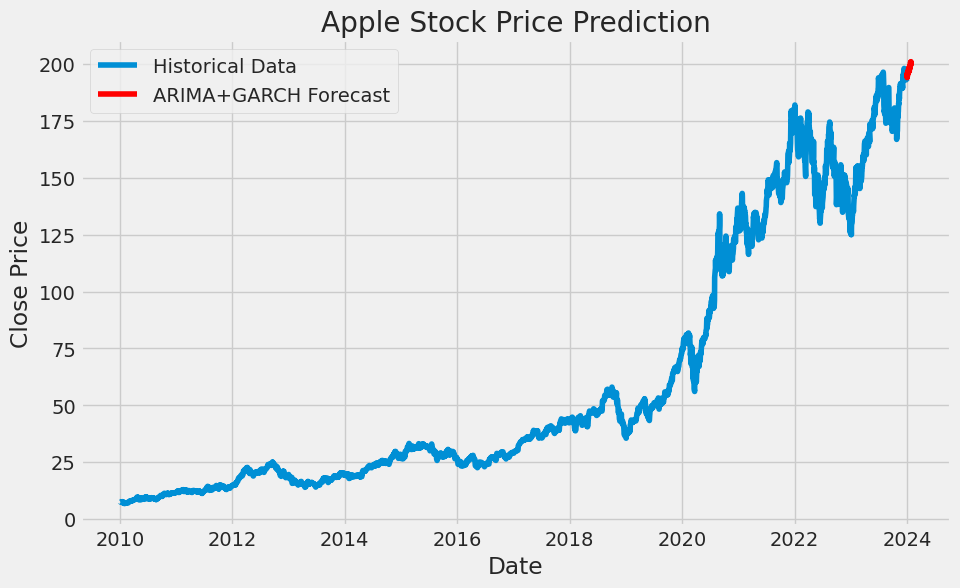

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.007771. Parameter
estimation work bette

Cross-Validation RMSE: 53.26628371316656


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001904. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
!pip install arch
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from arch import arch_model
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Download Apple stock data
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2024-01-01'

data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Preprocess the data
data = data[['Close']].dropna()

# Step 3: Log transform the data to stabilize variance
data['Close_log'] = np.log(data['Close'])

# Step 4: Check for seasonality using auto_arima with seasonal component
stepwise_model = auto_arima(data['Close_log'], start_p=1, start_q=1,
                            max_p=5, max_q=5, m=12,  # 'm=12' to check for yearly seasonality
                            start_P=0, seasonal=True,
                            d=1, D=1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True,
                            max_order=10, boxcox=True)

print(stepwise_model.summary())

# Step 5: Fit the ARIMA model using the log-transformed data
model = ARIMA(data['Close_log'], order=stepwise_model.order, seasonal_order=stepwise_model.seasonal_order)
model_fit = model.fit()

# Step 6: Extract residuals to model with GARCH
residuals = model_fit.resid

# Step 7: Fit GARCH model to the residuals to model heteroskedasticity
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(update_freq=5)
print(garch_fit.summary())

# Step 8: Make predictions with the ARIMA+GARCH model
forecast_steps = 30  # Predict the next 30 days
forecast_log = model_fit.forecast(steps=forecast_steps)
forecast = np.exp(forecast_log)  # Invert the log transformation

forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Step 9: Visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Historical Data')
plt.plot(forecast_dates, forecast, label='ARIMA+GARCH Forecast', color='red')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Step 10: Evaluate the combined model with Cross-Validation
def cross_validation(data, stepwise_model, garch_order, k=5):
    fold_size = len(data) // k
    errors = []

    for i in range(k):
        train = data[:i * fold_size + fold_size]
        test = data[i * fold_size + fold_size:(i + 1) * fold_size + fold_size]

        model = ARIMA(train, order=stepwise_model.order, seasonal_order=stepwise_model.seasonal_order)
        model_fit = model.fit()

        residuals = model_fit.resid
        garch_model = arch_model(residuals, vol='Garch', p=garch_order[0], q=garch_order[1])
        garch_fit = garch_model.fit(disp="off")

        predictions = model_fit.forecast(steps=len(test))
        predictions = np.exp(predictions)  # Invert log transformation

        rmse = np.sqrt(mean_squared_error(np.exp(test), predictions))
        errors.append(rmse)

    return np.mean(errors)

cv_rmse = cross_validation(data['Close_log'], stepwise_model, garch_order=(1, 1), k=5)
print(f'Cross-Validation RMSE: {cv_rmse}')


LSTM

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0027 - val_loss: 2.7073e-04
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.5364e-06 - val_loss: 2.2673e-04
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.2119e-06 - val_loss: 2.3046e-04
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.4586e-06 - val_loss: 1.9521e-04
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.7226e-06 - val_loss: 1.9553e-04
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.0969e-06 - val_loss: 1.7559e-04
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.1467e-06 - val_loss: 1.7408e-04
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.9012e-06 - val_loss: 2.7856e-04
Epoch 9/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.7602e-06 - val_loss: 1.9157e-04
Epoch 10/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.2502e-06 - val_loss: 4.4786e-04
Epoch 11/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.8567e-06 - 

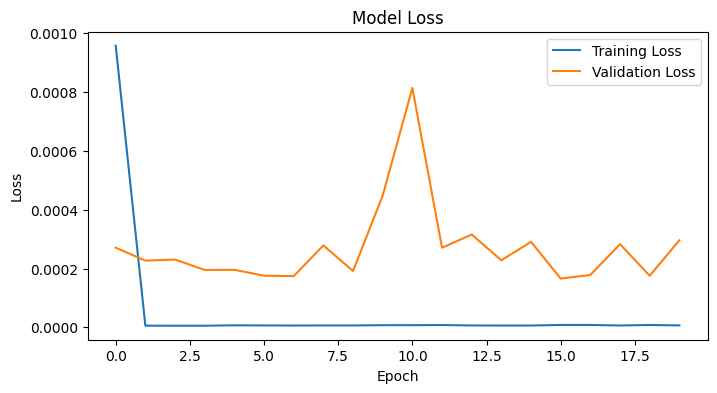

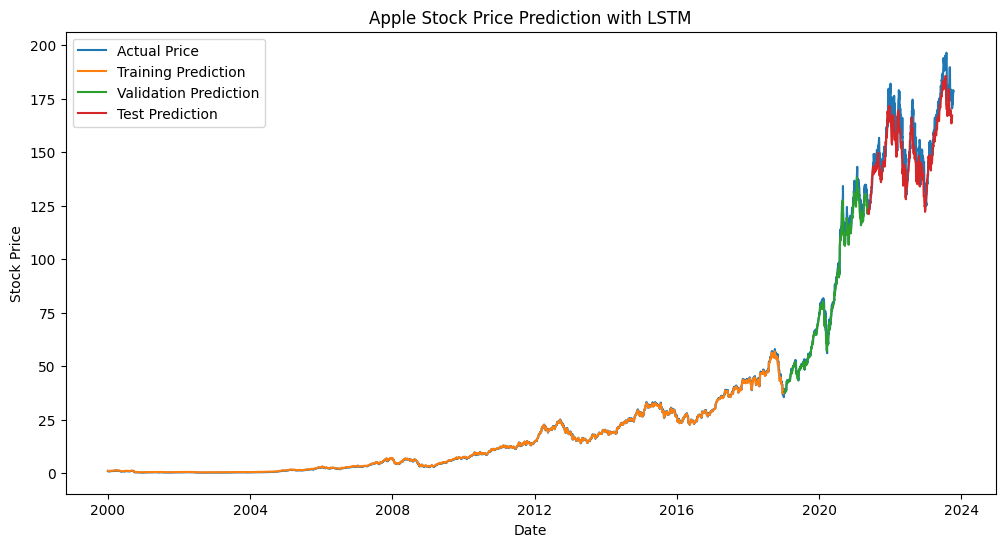

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load the data
data = pd.read_csv('AAPL.csv')  # Replace with the path to your data file
data = data[['Date', 'Close']]  # Use the 'Close' price for prediction
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the training, validation, and test sizes
train_size = int(len(scaled_data) * 0.8)  # 70% for training
val_size = int(len(scaled_data) * 0.1)   # 15% for validation
test_size = len(scaled_data) - train_size - val_size  # 15% for testing

# Create training, validation, and test datasets
train_data = scaled_data[:train_size]
val_data = scaled_data[train_size:train_size + val_size]
test_data = scaled_data[train_size + val_size:]

def create_sequences(data, time_step=3):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Create sequences
time_step = 3
X_train, y_train = create_sequences(train_data, time_step)
X_val, y_val = create_sequences(val_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with validation data
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_data=(X_val, y_val))

# Make predictions
train_predict = model.predict(X_train).flatten()
val_predict = model.predict(X_val).flatten()
test_predict = model.predict(X_test).flatten()

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1)).flatten()
val_predict = scaler.inverse_transform(val_predict.reshape(-1, 1)).flatten()
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1)).flatten()

# Inverse transform the actual data
y_train = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_val = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate RMSE
train_rmse = np.sqrt(np.mean((train_predict - y_train) ** 2))
val_rmse = np.sqrt(np.mean((val_predict - y_val) ** 2))
test_rmse = np.sqrt(np.mean((test_predict - y_test) ** 2))

# Calculate R² score
train_r2 = r2_score(y_train, train_predict)
val_r2 = r2_score(y_val, val_predict)
test_r2 = r2_score(y_test, test_predict)

print(f'Train RMSE: {train_rmse}')
print(f'Validation RMSE: {val_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train R²: {train_r2}')
print(f'Validation R²: {val_r2}')
print(f'Test R²: {test_r2}')

# Plot training & validation loss values
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Price')
plt.plot(data.index[:len(train_predict)], train_predict, label='Training Prediction')
plt.plot(data.index[len(train_predict) + time_step:len(train_predict) + time_step + len(val_predict)], val_predict, label='Validation Prediction')
plt.plot(data.index[len(train_predict) + len(val_predict) + time_step: len(train_predict) + len(val_predict) + time_step + len(test_predict)],
         test_predict, label='Test Prediction')  # Sliced to match test_predict length

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Apple Stock Price Prediction with LSTM')
plt.legend()
plt.show()


LSTM-CNN-GRU

[*********************100%***********************]  1 of 1 completed


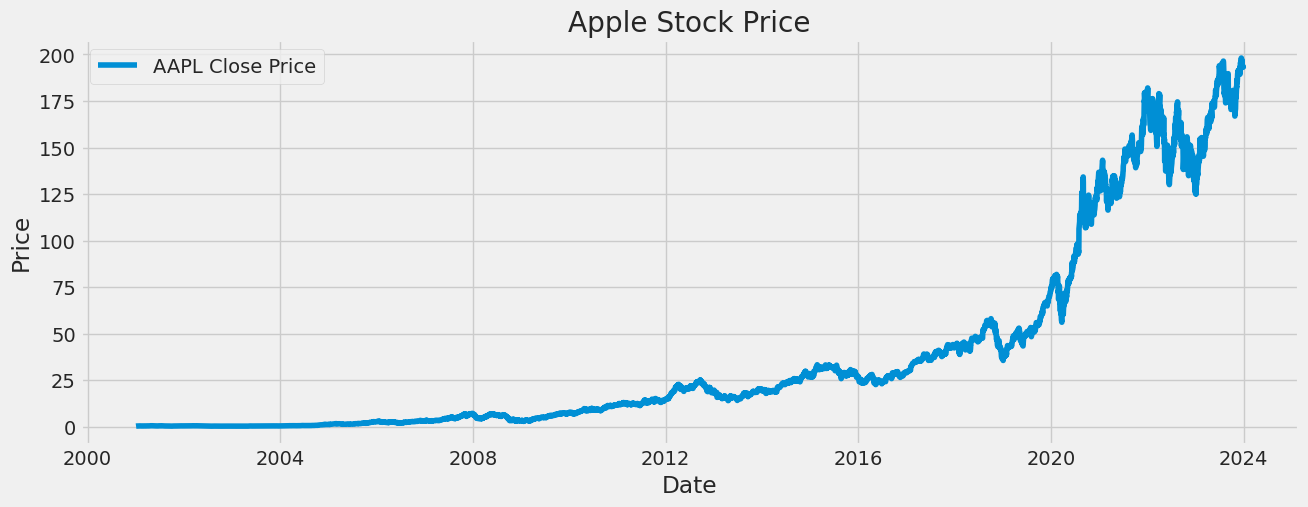

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)                   │ (None, 58, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 29, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 29, 100)             │          49,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 29, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 135,557 (529.52 KB)

 Trainable params: 135,557 (529.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 7.5151e-04 - val_loss: 2.7801e-04
Epoch 2/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 4.4328e-05 - val_loss: 3.0068e-04
Epoch 3/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 3.7786e-05 - val_loss: 5.8585e-04
Epoch 4/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 3.4401e-05 - val_loss: 2.2874e-04
Epoch 5/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 4.1410e-05 - val_loss: 1.9990e-04
Epoch 6/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - loss: 3.5100e-05 - val_loss: 1.7105e-04
Epoch 7/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 2.8529e-05 - val_loss: 3.2532e-04
Epoch 8/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 2.3870e-05 - val_loss: 1.6317e-04
Epoch 9/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - loss: 2.6948e-05 - val_loss: 4.2952e-04
Epoch 10/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 2.1111e-05 - val_loss: 1.5048e-04
Epoch 11/100
126/126 ━━━━━━━━━━━━━━━

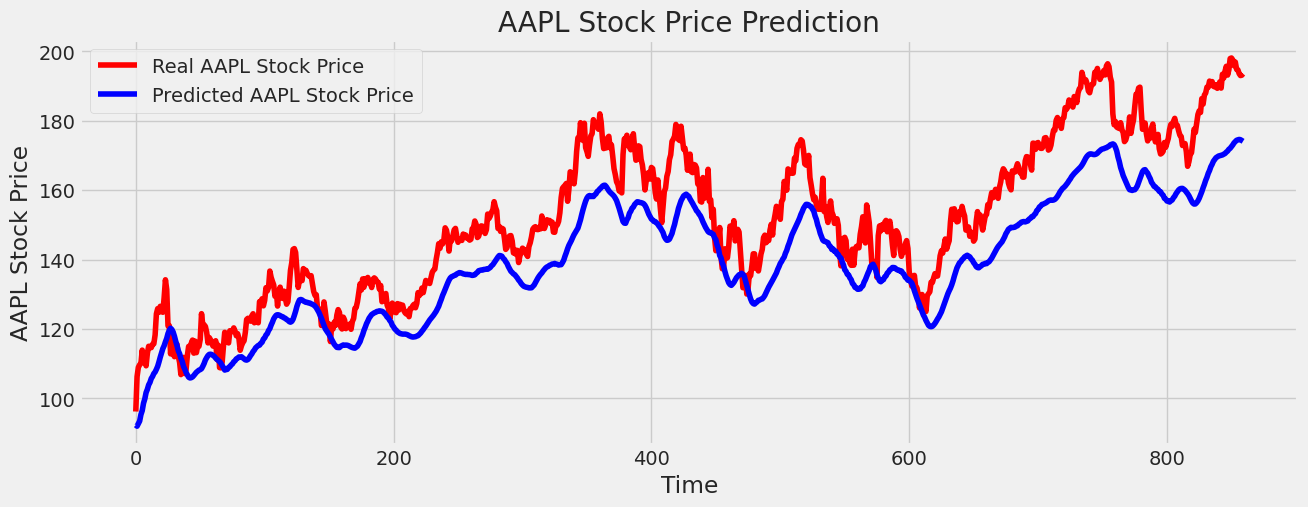

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
ticker = 'AAPL'
start_date = '2001-01-01'
end_date = '2024-01-01'

data = yf.download(ticker, start=start_date, end=end_date)

# Use only the 'Close' column for prediction
data = data[['Close']]

# Plot the data to visualize
plt.figure(figsize=(14, 5))
plt.plot(data['Close'], label='AAPL Close Price')
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Convert the data into a time series format
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X, Y = create_dataset(data_scaled, time_step)

# Reshape X to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define the hybrid CNN-LSTM-GRU model
model = Sequential()

# CNN Layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_step, 1)))
model.add(MaxPooling1D(pool_size=2))

# GRU Layer
model.add(GRU(units=100, return_sequences=True))
model.add(Dropout(0.3))

# LSTM Layer
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))

# Fully Connected Layer
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.summary()

# Split the data into training and testing sets (70% training, 15% validation, 15% testing)
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
Y_train, Y_val, Y_test = Y[:train_size], Y[train_size:train_size+val_size], Y[train_size+val_size:]

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32, callbacks=[early_stop])

# Evaluate the model on the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
real_stock_price = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate performance metrics
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
r2 = r2_score(real_stock_price, predicted_stock_price)  # Calculate R-squared

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2:.2f}")

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(real_stock_price, color='red', label='Real AAPL Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()


Cross Validated LSTM


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 3.3233e-05 - val_loss: 9.4146e-06
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 1.2006e-06 - val_loss: 7.7442e-06
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 2.7131e-07 - val_loss: 9.2392e-06
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 2.0658e-07 - val_loss: 9.3325e-06
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 1.9774e-07 - val_loss: 1.0183e-05
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 2.0918e-07 - val_loss: 8.6230e-06
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 1.9594e-07 - val_loss: 9.7824e-06
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Fold RMSE: 3.576647025173525
Fold R-squared: -3.40
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 4.4084e-05 - val_loss: 7.7106e-06
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 8.3245e-07 - val_loss: 5.7018e-06
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 1.0162e-06 - val_loss: 5.1385e-06
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 9.1603e-07 - val_loss: 4.8765e-06
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 8.1808e-07 - val_loss: 4.9129e-06
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 9.2765e-07 - val_loss: 4.6269e-06
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 7.1402e-07 - val_loss: 3.8624e-06
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 7.4959e-07 - val_loss: 3.6801e-06
Epoch 9/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 8.0066e-07 - val_loss: 3.4606e-06
Epoch 10/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 7.3143e-07 - val_loss: 4.3558e-06
Epoch 11/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 6.3240e-07 - val_los

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 1.3891e-04 - val_loss: 1.3462e-05
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 1.6640e-06 - val_loss: 2.1886e-05
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 1.7441e-06 - val_loss: 1.3365e-05
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 1.6022e-06 - val_loss: 1.1338e-05
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 1.6738e-06 - val_loss: 1.5862e-05
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 1.2975e-06 - val_loss: 1.5165e-05
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 1.7299e-06 - val_loss: 1.0189e-05
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 1.3134e-06 - val_loss: 1.2314e-05
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 1.5131e-06 - val_loss: 1.6284e-05
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 1.6820e-06 - val_loss: 1.3332e-05
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 1.5188e-06 - val_los

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 3.4428e-04 - val_loss: 3.2966e-05
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 4.4569e-06 - val_loss: 2.7334e-05
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 5.1578e-06 - val_loss: 2.6157e-05
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - loss: 4.4493e-06 - val_loss: 2.8252e-05
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 4.5002e-06 - val_loss: 2.3373e-05
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 4.7415e-06 - val_loss: 4.2609e-05
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 6.8651e-06 - val_loss: 2.5802e-05
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - loss: 3.9871e-06 - val_loss: 2.7256e-05
Epoch 9/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 4.0826e-06 - val_loss: 2.5298e-05
Epoch 10/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 4.4861e-06 - val_loss: 1.9913e-05
Epoch 11/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


135/135 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 3.8502e-04 - val_loss: 1.6658e-04
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 1.1463e-05 - val_loss: 1.6768e-04
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - loss: 1.0216e-05 - val_loss: 1.5577e-04
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - loss: 1.3934e-05 - val_loss: 1.7793e-04
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 1.5105e-05 - val_loss: 1.4109e-04
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - loss: 9.7293e-06 - val_loss: 1.2212e-04
Epoch 7/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - loss: 8.6996e-06 - val_loss: 1.3045e-04
Epoch 8/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 1.3115e-05 - val_loss: 9.3662e-05
Epoch 9/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 7.2287e-06 - val_loss: 9.0774e-05
Epoch 10/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 7.8973e-06 - val_loss: 8.9941e-05
Epoch 11/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/ste

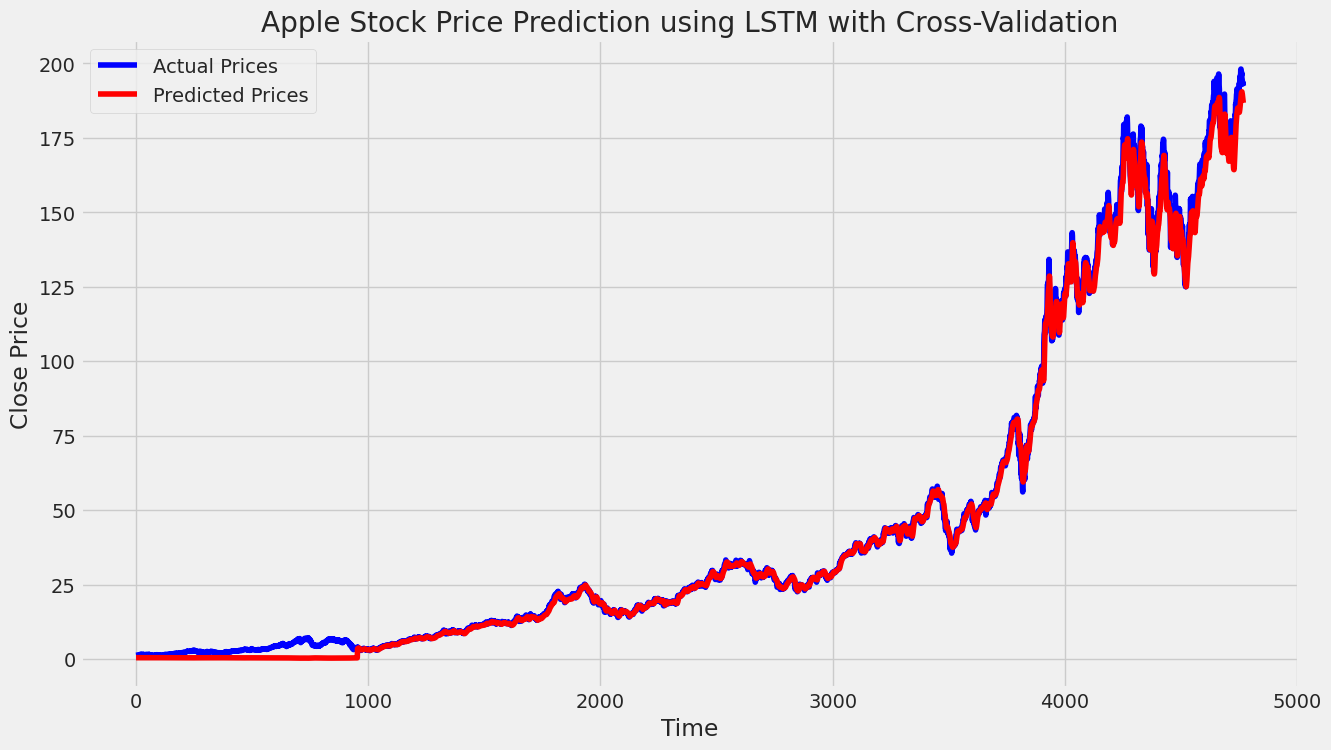

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Download Apple stock data
ticker = 'AAPL'
start_date = '2001-01-01'
end_date = '2024-01-01'

data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Preprocess the data
# Use the 'Close' column for LSTM modeling
data = data[['Close']].dropna()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Number of time steps to look back
X, y = create_sequences(scaled_data, seq_length)

# Reshape X to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Define a function to create the LSTM model
def create_model():
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Initialize TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)
val_losses = []
test_predictions = []
real_prices = []

# Cross-validation loop
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Early stopping to prevent overfitting
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Create and train the model
    model = create_model()
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, callbacks=[early_stop], verbose=1)

    # Predict on the test set
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate performance metrics for the current fold
    rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions))
    r2 = r2_score(y_test_inverse, predictions)

    print(f'Fold RMSE: {rmse}')
    print(f'Fold R-squared: {r2:.2f}')

    # Store results for overall evaluation
    val_losses.append(rmse)
    test_predictions.extend(predictions)
    real_prices.extend(y_test_inverse)

# Calculate overall metrics after cross-validation
overall_rmse = np.sqrt(mean_squared_error(real_prices, test_predictions))
overall_r2 = r2_score(real_prices, test_predictions)

print(f'Overall RMSE (Cross-Validated): {overall_rmse}')
print(f'Overall R-squared (Cross-Validated): {overall_r2:.2f}')

# Plot the cross-validated results
plt.figure(figsize=(14, 8))
plt.plot(real_prices, label='Actual Prices', color='blue')
plt.plot(test_predictions, label='Predicted Prices', color='red')
plt.title('Apple Stock Price Prediction using LSTM with Cross-Validation')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


ARIMA

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.4 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-18382.753, Time=1.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18380.253, Time=0.68 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-18384.748, Time=0.63 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-18384.748, Time=1.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-18372.915, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-18382.748, Time=1.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-18380.747, Time=1.73 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-18376.599, Time=0.17 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 8.326 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3522
Model:               SARIMAX(1, 1, 0)   Log Likelihood                9195.374
Date:                Wed, 04 Sep 2024   AIC                         -18384.748
Time:               

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

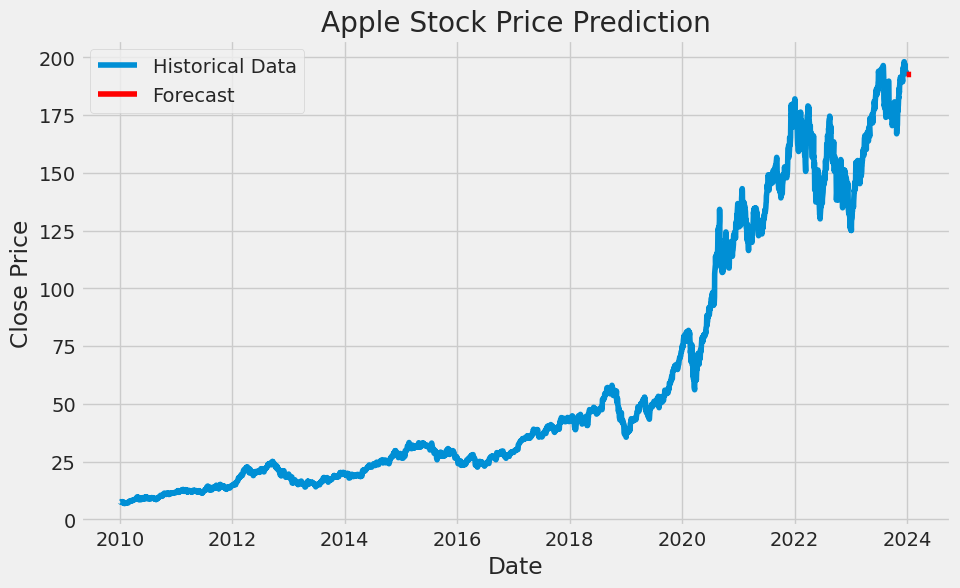

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Cross-Validation RMSE: 18.82
Cross-Validation MSE: 653.51
Cross-Validation MAE: 14.89
Cross-Validation R-squared: -0.93


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

In [ ]:
!pip install pmdarima
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Import required metrics
import numpy as np

# Step 1: Download Apple stock data
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2024-01-01'

data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Preprocess the data
# Use the 'Close' column for ARIMA modeling
data = data[['Close']]
data = data.dropna()

# Step 3: Log transform the data to stabilize variance
data['Close_log'] = np.log(data['Close'])

# Step 4: Use auto_arima to find the best order (p, d, q) with boxcox transformation
stepwise_model = auto_arima(data['Close_log'], start_p=1, start_q=1,
                            max_p=5, max_q=5, m=1,
                            start_P=0, seasonal=False,
                            d=None, D=0, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True,
                            max_order=10, boxcox=True)

print(stepwise_model.summary())

# Step 5: Fit the ARIMA model using the log-transformed data
model = ARIMA(data['Close_log'], order=stepwise_model.order)
model_fit = model.fit()

# Step 6: Make predictions
forecast_steps = 30  # Predict the next 30 days
forecast_log = model_fit.forecast(steps=forecast_steps)
forecast = np.exp(forecast_log)  # Invert the log transformation

forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Step 7: Visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Historical Data')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Step 8: Cross-validation (Improved Evaluation)
def cross_validation(data, stepwise_model, k=5):
    fold_size = len(data) // k
    rmse_errors = []
    mse_errors = []
    mae_errors = []
    r2_scores = []

    for i in range(k):
        train = data[:i * fold_size + fold_size]
        test = data[i * fold_size + fold_size:(i + 1) * fold_size + fold_size]

        model = ARIMA(train, order=stepwise_model.order)
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test))
        predictions = np.exp(predictions)  # Invert log transformation

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(np.exp(test), predictions))
        mse = mean_squared_error(np.exp(test), predictions)
        mae = mean_absolute_error(np.exp(test), predictions)
        r2 = r2_score(np.exp(test), predictions)

        # Append metrics
        rmse_errors.append(rmse)
        mse_errors.append(mse)
        mae_errors.append(mae)
        r2_scores.append(r2)

    # Calculate average metrics
    avg_rmse = np.mean(rmse_errors)
    avg_mse = np.mean(mse_errors)
    avg_mae = np.mean(mae_errors)
    avg_r2 = np.mean(r2_scores)

    return avg_rmse, avg_mse, avg_mae, avg_r2

# Calculate cross-validation metrics
cv_rmse, cv_mse, cv_mae, cv_r2 = cross_validation(data['Close_log'], stepwise_model, k=5)

# Print the metrics
print(f'Cross-Validation RMSE: {cv_rmse:.2f}')
print(f'Cross-Validation MSE: {cv_mse:.2f}')
print(f'Cross-Validation MAE: {cv_mae:.2f}')
print(f'Cross-Validation R-squared: {cv_r2:.2f}')



ARIMA+GARCH

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 10.4 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=23.18 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-15915.980, Time=1.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-16866.184, Time=2.87 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=20.07 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-15918.867, Time=0.98 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-17278.185, Time=5.58 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=31.36 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=19.36 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-17276.420, Time=4.71 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-17276.296, Time=7.68 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-17275.828, Time=10.96 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-17278.159, Time=4.53 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=-17274.277, Time=23.74 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=-17276.190, Time=25.76 sec

Best model:

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001903. Parameter
estimation work bette

Optimization terminated successfully    (Exit mode 0)
            Current function value: -8757.596583315666
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8757.60
Distribution:                  Normal   AIC:                          -17507.2
Method:            Maximum Likelihood   BIC:                          -17482.5
                                        No. Observations:                 3522
Date:                Wed, Sep 04 2024   Df Residuals:                     3521
Time:                        18:02:18   Df Model:                            1
                                  Mean Model                                 
   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


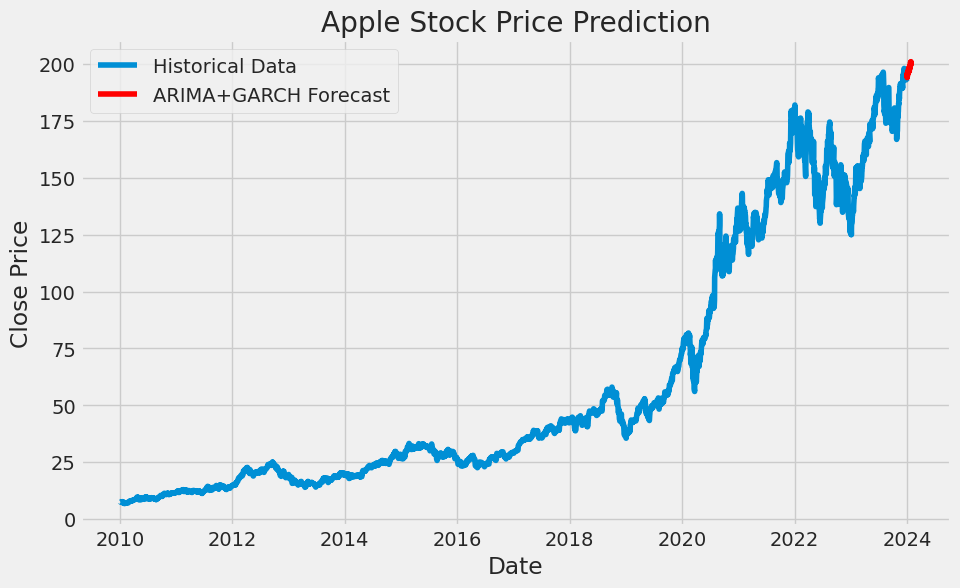

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.007771. Parameter
estimation work bette

Cross-Validation RMSE: 53.27
Cross-Validation MSE: 5304.82
Cross-Validation MAE: 45.50
Cross-Validation R-squared: -13.93


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001904. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
!pip install arch
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from arch import arch_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Import required metrics
import numpy as np

# Step 1: Download Apple stock data
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2024-01-01'

data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Preprocess the data
data = data[['Close']].dropna()

# Step 3: Log transform the data to stabilize variance
data['Close_log'] = np.log(data['Close'])

# Step 4: Check for seasonality using auto_arima with seasonal component
stepwise_model = auto_arima(data['Close_log'], start_p=1, start_q=1,
                            max_p=5, max_q=5, m=12,  # 'm=12' to check for yearly seasonality
                            start_P=0, seasonal=True,
                            d=1, D=1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True,
                            max_order=10, boxcox=True)

print(stepwise_model.summary())

# Step 5: Fit the ARIMA model using the log-transformed data
model = ARIMA(data['Close_log'], order=stepwise_model.order, seasonal_order=stepwise_model.seasonal_order)
model_fit = model.fit()

# Step 6: Extract residuals to model with GARCH
residuals = model_fit.resid

# Step 7: Fit GARCH model to the residuals to model heteroskedasticity
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(update_freq=5)
print(garch_fit.summary())

# Step 8: Make predictions with the ARIMA+GARCH model
forecast_steps = 30  # Predict the next 30 days
forecast_log = model_fit.forecast(steps=forecast_steps)
forecast = np.exp(forecast_log)  # Invert the log transformation

forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Step 9: Visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Historical Data')
plt.plot(forecast_dates, forecast, label='ARIMA+GARCH Forecast', color='red')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Step 10: Evaluate the combined model with Cross-Validation
def cross_validation(data, stepwise_model, garch_order, k=5):
    fold_size = len(data) // k
    rmse_errors = []
    mse_errors = []
    mae_errors = []
    r2_scores = []

    for i in range(k):
        train = data[:i * fold_size + fold_size]
        test = data[i * fold_size + fold_size:(i + 1) * fold_size + fold_size]

        # Fit ARIMA model
        model = ARIMA(train, order=stepwise_model.order, seasonal_order=stepwise_model.seasonal_order)
        model_fit = model.fit()

        # Fit GARCH model on ARIMA residuals
        residuals = model_fit.resid
        garch_model = arch_model(residuals, vol='Garch', p=garch_order[0], q=garch_order[1])
        garch_fit = garch_model.fit(disp="off")

        # Forecast using ARIMA model
        predictions = model_fit.forecast(steps=len(test))
        predictions = np.exp(predictions)  # Invert log transformation

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(np.exp(test), predictions))
        mse = mean_squared_error(np.exp(test), predictions)
        mae = mean_absolute_error(np.exp(test), predictions)
        r2 = r2_score(np.exp(test), predictions)

        # Append metrics to respective lists
        rmse_errors.append(rmse)
        mse_errors.append(mse)
        mae_errors.append(mae)
        r2_scores.append(r2)

    # Calculate average metrics
    avg_rmse = np.mean(rmse_errors)
    avg_mse = np.mean(mse_errors)
    avg_mae = np.mean(mae_errors)
    avg_r2 = np.mean(r2_scores)

    return avg_rmse, avg_mse, avg_mae, avg_r2

# Calculate cross-validation metrics
cv_rmse, cv_mse, cv_mae, cv_r2 = cross_validation(data['Close_log'], stepwise_model, garch_order=(1, 1), k=5)

# Print the metrics
print(f'Cross-Validation RMSE: {cv_rmse:.2f}')
print(f'Cross-Validation MSE: {cv_mse:.2f}')
print(f'Cross-Validation MAE: {cv_mae:.2f}')
print(f'Cross-Validation R-squared: {cv_r2:.2f}')
